In [1]:
from pathlib import Path
import numpy as np
import SimpleITK as sitk
%matplotlib notebook
import multiscale.itk.itk_plotting as iplt
import matplotlib.pyplot as plt

In [2]:
us_path = Path(r'F:\Research\LINK\Mouse data\2019-02-15\Run-2\Output', 'fused_tp_0_ch_0.tif')
shg_path = Path(r'F:\Research\LINK\Mouse data\2019-02-15', '8x fused shg.tif')

In [144]:
us_image = sitk.ReadImage(str(us_path))
us_image.SetSpacing([46.2022, 46.2022, 46.2022])
shg_image = sitk.ReadImage(str(shg_path))
shg_image.SetSpacing([4.08, 4.08,  4.08])

In [145]:
us_image_windowed = sitk.IntensityWindowing(us_image, 100, 160)
us_array = sitk.GetArrayFromImage(us_image_windowed)
us_array_rotated = np.swapaxes(us_array, 0, 1)
us_array_rotated = np.flip(us_array_rotated, 0)
us_image_rotated = sitk.GetImageFromArray(us_array_rotated)
us_image_rotated.SetSpacing(us_image.GetSpacing())

Box(children=(IntSlider(value=104, description='image slice:', max=208), IntSlider(value=24, description='imag…

<IPython.core.display.Javascript object>


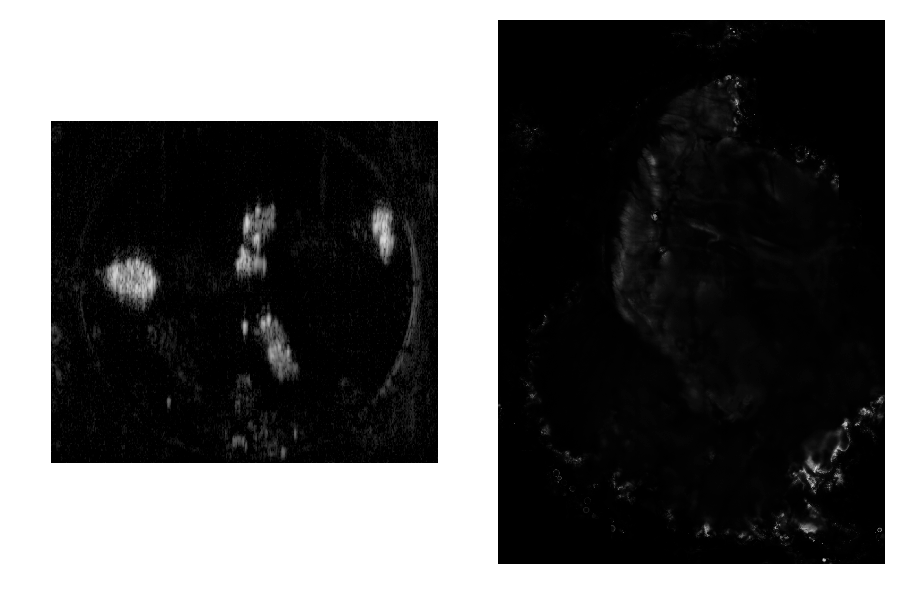

In [146]:
iplt.MultiImageDisplay(image_list=[us_image_rotated, shg_image])

In [171]:
us_origin = [-9967-6400, -10033.16, 0]
shg_origin = [-5063.689, -3605.1585, 0]

us_image_rotated.SetOrigin(us_origin)
shg_image.SetOrigin(shg_origin)

In [172]:
shg_resampled = sitk.Resample(shg_image, us_image_rotated, sitk.AffineTransform(3), sitk.sitkNearestNeighbor, 0.0, shg_image.GetPixelID())

In [173]:
shg_image.GetDirection()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

Box(children=(IntSlider(value=104, description='image slice:', max=208), IntSlider(value=104, description='ima…

<IPython.core.display.Javascript object>


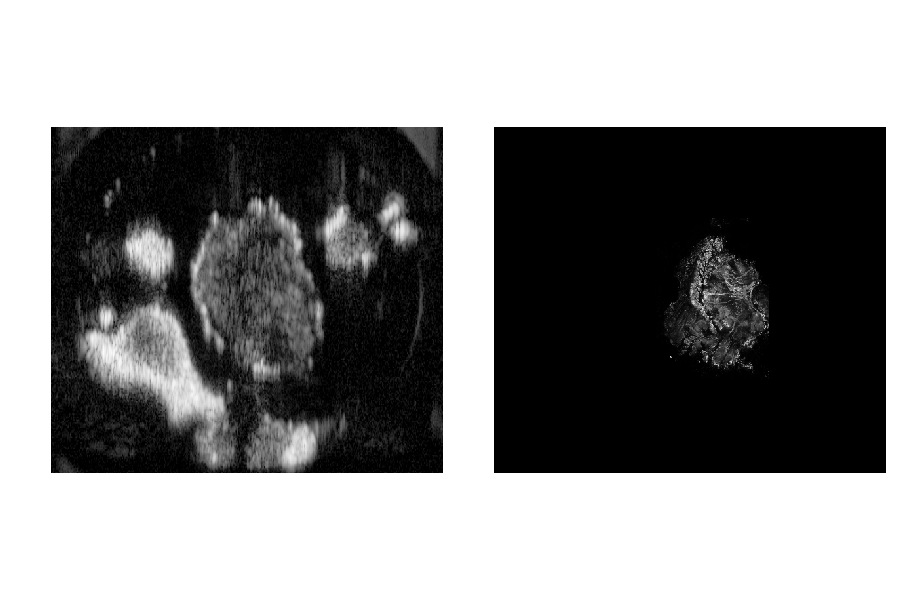

In [174]:
iplt.MultiImageDisplay(image_list=[us_image_rotated, shg_resampled])